In [39]:
'''
__author__ = 'Alex Cheng'
sklearn惩罚线性回归模型
基扩展

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import roc_curve,auc
from math import sqrt

In [40]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
"wine-quality/winequality-red.csv")
df = pd.read_csv(target_url,header=0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
x  = np.array(df.iloc[:,:-1]) # 属性数组
labels = [i for i in df.iloc[:,-1]] # 最后一列就是label
names = list(df.columns)


In [50]:
xList = []
for i in range(len(x)):
    xList.append([])
# 添加 alcohol的平方项
for i in range(len(x)):
    alcElt = x[i][-1]
    volAcid = x[i][1]
    temp = list(x[i])
    temp.append(alcElt * alcElt)
    temp.append(alcElt * volAcid)
    xList[i] = list(temp)

# 添加新列明
names = names + ['alco^2','alco*volAcid']
#names.append('alco^2')
#names.append('alco*volAcid')

In [55]:
print(x.shape,len(xList),len(xList[0]))

(1599, 11) 1599 13


In [56]:
# 正则化columns in x and labels
nrows = len(xList)
ncols = len(xList[0])

# 计算means and variance
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = sum((col - mean) **2)
    
    colDiff2 = [(xList[j][i] - mean) for j in range(nrows) ]
    sumSq = sum([colDiff2[i]  * colDiff2[i] for i in range(nrows)])
    stdDev2 = sqrt(sumSq/nrows)
    
    stdDev = sqrt(colDiff/nrows)
    xSD.append(stdDev)
#print(xMeans,'\n',xSD)
#print(stdDev == stdDev2) # broadcast广播变量的方式，发现结果一样


# 正则化xList
xNorm = []
for i in range(nrows):
    #rowNorm = ([xList[i] - xMeans]) / xSD  #列表不支持
    rowNorm = [(xList[i][j] - xMeans[j]) / xSD[j] for j in range(ncols)]
    xNorm.append(rowNorm)

# 正则化 labels
meanLable = sum(labels)/ nrows
sdLabel = sqrt(sum([ (labels[i] - meanLable) * (labels[i] - meanLable) for i in range(nrows)]) / nrows)
labelNorm = [ (labels[i] - meanLable) / sdLabel for i in range(nrows) ]

In [57]:
print(x.shape,len(xNorm),len(xNorm[0]))

(1599, 11) 1599 13


In [58]:
# 将输入从list转换为np array 为了应用sklearn packages
# 正则化的x,y
Xn = np.array(xNorm)
Yn = np.array(labelNorm)
# 未正则化的x,y
X = np.array(xList) # xList本来已经就是numpy array
Y = np.array(labels)

In [59]:
Xn.shape,X.shape

((1599, 13), (1599, 13))

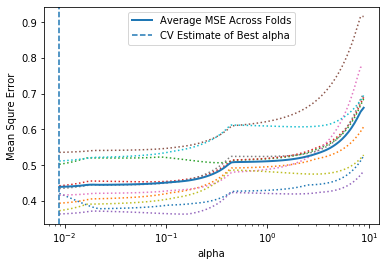

alpha value that Minimize CV error 0.00887369899599796
minimun MSE 0.43915574031440663


In [68]:
# LassoCV
#alpha控制估计参数的稀疏度,自动搜索，越大惩罚项越大
wineModel = linear_model.LassoCV(cv=10).fit(X,Y) # 

plt.figure()
plt.plot(wineModel.alphas_[::-1],wineModel.mse_path_[::-1],':')
plt.plot(wineModel.alphas_,wineModel.mse_path_.mean(axis=-1),
        label='Average MSE Across Folds',linewidth=2)
plt.axvline(wineModel.alpha_,linestyle='--',label='CV Estimate of Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('Mean Squre Error')
plt.axis('tight')
plt.show()

print("alpha value that Minimize CV error", wineModel.alpha_)
print("minimun MSE",min(wineModel.mse_path_.mean(axis=-1)))


In [64]:
wineModel.mse_path_.shape

(100, 10)